<a href="https://colab.research.google.com/github/themanoftalent/NLP/blob/main/PyTrorchFirstProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# !pip3 install torch torchvision torchaudio

In [14]:
import torch

In [15]:
print(torch.__version__)

1.12.0+cu113


In [16]:
torch.cuda.is_available()

True

In [17]:
import urllib.request 

In [18]:
url ='https://is3-ssl.mzstatic.com/image/thumb/Purple71/v4/8d/94/80/8d94809f-49fb-be9a-164b-292c73781982/source/256x256bb.jpg'

In [19]:
# url="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/British_blue_2009_%28cropped%29.jpg/1200px-British_blue_2009_%28cropped%29.jpg"

In [20]:
# url= 'https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2022%2F01%2F06%2Fabyssinian-outdoors-1290957479-2000.jpg&q=60'

In [21]:
file_name='dog.jpg'

In [22]:
urllib.request.urlretrieve(url,file_name)

('dog.jpg', <http.client.HTTPMessage at 0x7f9f9ce00150>)

In [23]:
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
img = Image.open(file_name)

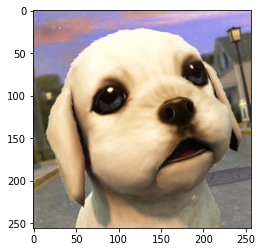

In [25]:
plt.imshow(img);

*Preprocessing*

In [26]:
from torchvision import transforms 

In [27]:
preprocess = transforms.Compose([
    transforms.Resize(512),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.401,0.426,0.430],
        std=[0.201,0.210,0.220]
    )
])

In [28]:
img_transform= preprocess(img)

In [29]:
img_transform.shape

torch.Size([3, 224, 224])

In [30]:
batch= img_transform.unsqueeze(0)

In [31]:
batch.shape

torch.Size([1, 3, 224, 224])

**Importing models from web**

In [32]:
from torchvision import models

In [33]:
model= models.vgg19_bn(pretrained=True,num_classes=1000)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [35]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [36]:
y= model(batch.to(device))

In [37]:
y.shape #torch.Size([1, 1000]), 1 batch, 1000 sınıf

torch.Size([1, 1000])

In [38]:
y_max, index= torch.max(y,1)

In [39]:
index,y_max

(tensor([242], device='cuda:0'),
 tensor([4.8437], device='cuda:0', grad_fn=<MaxBackward0>))

In [40]:
url_class = 'https://pytorch.tips/imagenet-labels'

In [41]:
file_image_labels = 'imagenet_class_labels.txt'

In [42]:
urllib.request.urlretrieve(url_class,file_image_labels)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x7f9f9c87e9d0>)

In [43]:
with open('imagenet_class_labels.txt','r') as f:
  classes= [line.strip() for line in f.readlines()]

In [44]:
print(classes[242])


242: 'boxer',


In [45]:
# with open('imagenet_class_labels.txt','r') as f:
#   for lines in f.readlines():
#     if lines.strip() == 200:
#       print(lines)
#     else:
#       break

In [46]:
# file = open("imagenet_class_labels.txt")
# search_word = input("enter a word you want to search in file: ")
# if(search_word in file.read()):
#   print("word found",search_word)
# else:
#   print("word not found")

In [47]:
with open('imagenet_class_labels.txt','r') as f:
  classing = [lines.strip() for lines in f.readlines()]
  print(classing[285])


285: 'Egyptian cat',
